In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")




Using cuda device


In [2]:
train_data = datasets.FashionMNIST(
    root="data", # file name
    train=True, # download train data only
    download=True,
    transform=ToTensor() , # tranform data to tensor
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False, # download test data only
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.46MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 191kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.59MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.7MB/s]


In [3]:
image ,  label = train_data[50]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0039, 0.0000, 0.0000, 0.0353, 0.0235, 0.0000, 0.0000, 0.0000,
          0.0941, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.2627, 0.8196, 0.9059, 0.9725, 0.9882, 0.9804, 0.9922,
          0.9647, 0.8078, 0.5176, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0039, 0.8902, 0.9529, 0.9176, 0.9176, 0.9725, 0.9647, 0.9333,
          0.9020, 0.9176, 0.9804, 0.4941, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.2235, 0.9059, 0.8353, 0.8902, 0.9176, 0.9098, 0.9059, 0.9216,
          0.9098, 0.8549, 0.8549, 0.8706, 0.0000, 0.0000,

In [4]:
image.shape

#C H W
#chanal , haight ,  wedth

# input 784 pixel
#if c =  3  multply in 784

torch.Size([1, 28, 28])

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
train_data.classes[label]

'Dress'

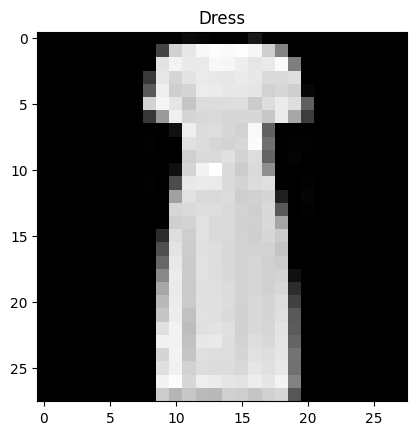

In [7]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap="gray")
plt.title(train_data.classes[label])
plt.show()

In [8]:
#batching data
from torch.utils.data import DataLoader

batch_size = 32


train_dataloader = DataLoader(train_data,
                              batch_size=batch_size,
                              shuffle=True )



test_dataloader = DataLoader(test_data,
                             batch_size=batch_size )

In [9]:
len(train_dataloader)

1875

# model

In [10]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))

In [11]:
train_features_batch.shape

torch.Size([32, 1, 28, 28])

In [12]:
flatten_model = nn.Flatten()
X = train_features_batch[0]
output = flatten_model(X)

In [13]:
X.shape , output.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32, 784]))

In [14]:
class FashionMNISTModel(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),  #activation fun

             nn.Linear(in_features=hidden_units,
                      out_features=hidden_units),
            nn.ReLU(),

            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )


    def forward(self, x):
        return self.layer_stack(x)

In [15]:
torch.manual_seed(42)

model0 = FashionMNISTModel(input_shape=784, # number of input features (28*28 images)
                            hidden_units=10, # number of neurons in hidden layers
                            output_shape=len(class_names)) # number of output classes

model0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [16]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


from helper_functions import accuracy_fn

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01) # Reduced learning rate

In [20]:
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    train_loss = 0

    for batch, (X, y) in enumerate(dataloader):
        # Forward pass
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(dataloader.dataset)} samples")

    # Average loss
    train_loss /= len(dataloader)
    return train_loss


In [21]:
def test_step(model, dataloader, loss_fn, accuracy_fn):
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for X, y in dataloader:
            y_pred = model(X)

            test_loss += loss_fn(y_pred, y).item()
            test_acc += accuracy_fn(
                y_true=y,
                y_pred=y_pred.argmax(dim=1)
            )

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    return test_loss, test_acc


In [22]:
from tqdm.auto import tqdm
torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")

    train_loss = train_step(
        model=model0,
        dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer
    )

    test_loss, test_acc = test_step(
        model=model0,
        dataloader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

    print(
        f"Train loss: {train_loss:.4f} | "
        f"Test loss: {test_loss:.4f} | "
        f"Test accuracy: {test_acc:.4f}"
    )


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.4620 | Test loss: 0.4770 | Test accuracy: 83.1070
Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.4471 | Test loss: 0.4682 | Test accuracy: 83.3067
Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.4367 | Test loss: 0.4600 | Test accuracy: 83.7460
